In [19]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

# Load data
df = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date') # Read the CSV file
df = df[['Close']] # Select only the close price column


# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.values)


# Split the data into train and test sets
train_size = int(len(df_scaled) * 0.7) # Use 70% of the data for training
train_data = df_scaled[:train_size]
test_data = df_scaled[train_size:]

# Create a function to generate X and y datasets for training and testing
def create_dataset(data, window_size):
  X = []
  y = []
  for i in range(window_size, len(data)):
    X.append(data[i-window_size:i]) # Use previous window_size data points as features
    y.append(data[i]) # Use current data point as target
  return np.array(X), np.array(y)

# Define the window size
window_size = 30 # Use previous 60 days of data to predict the next day

# Generate X_train and y_train datasets
X_train, y_train = create_dataset(train_data, window_size)

# Generate X_test and y_test datasets
X_test, y_test = create_dataset(test_data, window_size)

# Reshape the data to 3D for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build a sequential model with the Adam optimizer
model = Sequential()
model.add(LSTM(75, return_sequences=True, input_shape=(X_train.shape[1], 1))) # Add a LSTM layer with 50 units and return sequences
model.add(Dropout(0.2)) # Add a dropout layer to prevent overfitting
model.add(LSTM(75, return_sequences=True)) # Add another LSTM layer with 50 units and return sequences
model.add(Dropout(0.2)) # Add another dropout layer to prevent overfitting
model.add(LSTM(75)) # Add another LSTM layer with 50 units
model.add(Dropout(0.2)) # Add another dropout layer to prevent overfitting
model.add(Dense(1)) # Add a dense layer with one unit for output

optmizers: list[str] = ['sgd','Adam','RMSprop','Adagrad','Adadelta','Adamax','Nadam','Ftrl']
#optmizers: list[str] = ['Adamax']
y_pred = {}
for optmizer in optmizers:
    model.compile(loss='mae',optimizer=optmizer) # Use optimizer and mean squared error as loss function
    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32) # Train for 50 epochs with batch size of 32
    # Evaluate the model on test data
    test_loss = model.evaluate(X_test, y_test)
    print('Test loss:', test_loss)
    # Make predictions on test data
    y_pred[optmizer] = model.predict(X_test)
    y_pred[optmizer] = scaler.inverse_transform(y_pred[optmizer]) # Reverse the scaling

Epoch 1/50
19/19 [==============================] - 5s 76ms/step - loss: 0.3141
Epoch 2/50
19/19 [==============================] - 1s 75ms/step - loss: 0.1706
Epoch 3/50
19/19 [==============================] - 1s 77ms/step - loss: 0.1573
Epoch 4/50
19/19 [==============================] - 1s 73ms/step - loss: 0.1457
Epoch 5/50
19/19 [==============================] - 1s 74ms/step - loss: 0.1277
Epoch 6/50
19/19 [==============================] - 1s 71ms/step - loss: 0.1078
Epoch 7/50
19/19 [==============================] - 1s 71ms/step - loss: 0.0792
Epoch 8/50
19/19 [==============================] - 1s 71ms/step - loss: 0.0680
Epoch 9/50
19/19 [==============================] - 1s 71ms/step - loss: 0.0663
Epoch 10/50
19/19 [==============================] - 1s 72ms/step - loss: 0.0698
Epoch 11/50
19/19 [==============================] - 1s 71ms/step - loss: 0.0670
Epoch 12/50
19/19 [==============================] - 1s 71ms/step - loss: 0.0683
Epoch 13/50
19/19 [==================

19/19 [==============================] - 1s 67ms/step - loss: 0.0268
Epoch 48/50
19/19 [==============================] - 1s 67ms/step - loss: 0.0278
Epoch 49/50
19/19 [==============================] - 1s 66ms/step - loss: 0.0263
Epoch 50/50
8/8 [==============================] - 1s 17ms/step - loss: 0.0227
Test loss: 0.022684918716549873
8/8 [==============================] - 1s 16ms/step
Epoch 1/50
19/19 [==============================] - 5s 72ms/step - loss: 0.0266
Epoch 2/50
19/19 [==============================] - 1s 72ms/step - loss: 0.0274
Epoch 3/50
19/19 [==============================] - 1s 73ms/step - loss: 0.0275
Epoch 4/50
19/19 [==============================] - 1s 75ms/step - loss: 0.0277
Epoch 5/50
19/19 [==============================] - 2s 79ms/step - loss: 0.0271
Epoch 6/50
19/19 [==============================] - 2s 79ms/step - loss: 0.0270
Epoch 7/50
19/19 [==============================] - 1s 78ms/step - loss: 0.0267
Epoch 8/50
19/19 [============================

19/19 [==============================] - 2s 81ms/step - loss: 0.3315
Epoch 42/50
19/19 [==============================] - 2s 80ms/step - loss: 0.3310
Epoch 43/50
19/19 [==============================] - 2s 83ms/step - loss: 0.3306
Epoch 44/50
19/19 [==============================] - 2s 83ms/step - loss: 0.3302
Epoch 45/50
19/19 [==============================] - 2s 82ms/step - loss: 0.3297
Epoch 46/50
19/19 [==============================] - 2s 83ms/step - loss: 0.3293
Epoch 47/50
19/19 [==============================] - 2s 82ms/step - loss: 0.3289
Epoch 48/50
19/19 [==============================] - 2s 83ms/step - loss: 0.3286
Epoch 49/50
19/19 [==============================] - 2s 82ms/step - loss: 0.3282
Epoch 50/50
8/8 [==============================] - 1s 17ms/step - loss: 0.4933
Test loss: 0.49333107471466064
8/8 [==============================] - 1s 16ms/step


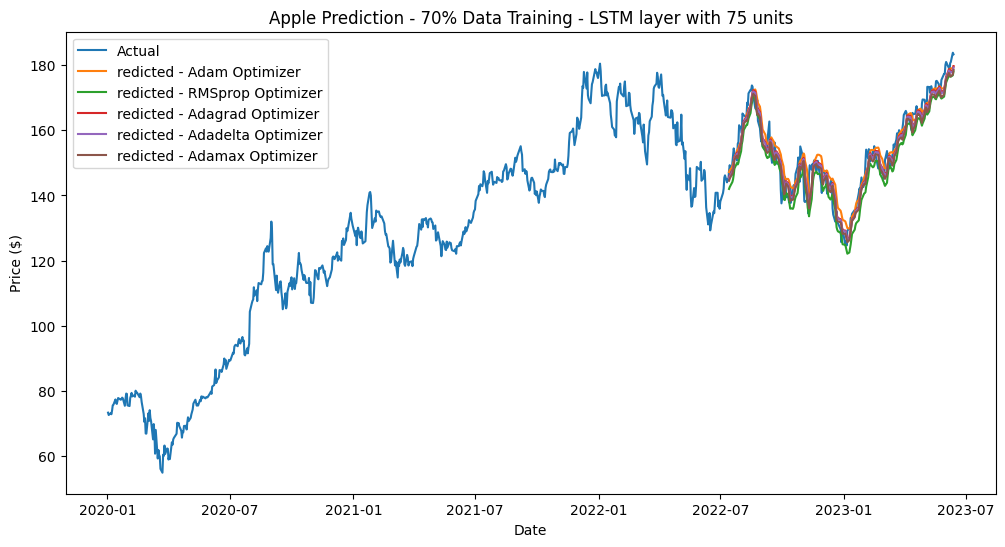

In [28]:
plt.figure(figsize=(12,6))
plt.title('Apple Prediction - 70% Data Training - LSTM layer with 75 units')
plt.plot(df['Close'], label='Actual')
for key in y_pred:
    if key in["sgd","Ftrl","Nadam"]:
        pass
    else:
        plt.plot(df.index[window_size+train_size:], y_pred[key], label=f"redicted - {key} Optimizer")
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

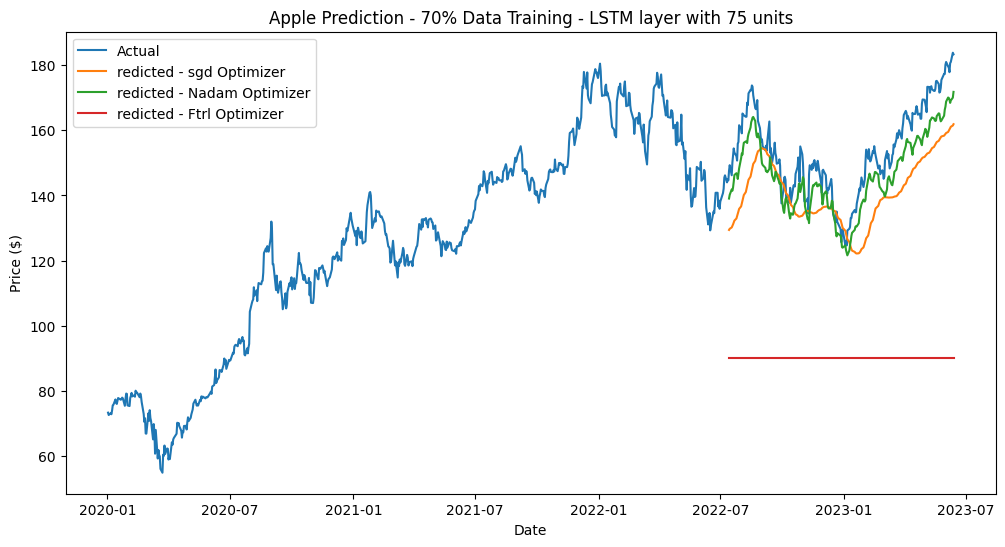

In [25]:
plt.figure(figsize=(12,6))
plt.title('Apple Prediction - 70% Data Training - LSTM layer with 75 units')
plt.plot(df['Close'], label='Actual')
for key in y_pred:
    if key in["sgd","Ftrl","Nadam"]:
        plt.plot(df.index[window_size+train_size:], y_pred[key], label=f"redicted - {key} Optimizer")
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()